This lab investigates two methods of solving higher order differential equations. They both have advantages and disadvantages. When doing this lab, think about the differences between the two methods, and the differences between first and second order differential equations. 

In [70]:
## import packages
import numpy as np
import scipy as sp
import matplotlib 
import matplotlib.pyplot as plt 

Consider a general second order differential equation $\frac{d^2y}{dt^2}=f(t,y,\frac{dy}{dt})$, given the initial conditions $y(0)=\alpha$, $y'(0)=\beta$. We discretize the differential equation by replacing the derivatives in the following way: 

$$y'(t_{j+1})\approx \frac{y_{j+1}-y_j}{\Delta t},$$
and 
$$y''(t_{j+1})\approx \frac{y_{j+1}-2y_j+y_{j-1}}{(\Delta t)^2},$$
then we move all the values $y_{j+1}$ to the left hand side of the discrete equation. We get a general difference equation in the following format
$$y_{j+1}=f(t_i,y_i,y_{j-1}).$$ 
With the initial conditions $y_0=\alpha$, and $\frac{y_1-y_0}{\Delta t}=\beta$, we can solve the difference equation forward in a iterative fashion. 

We consider the *nonlinear* equation $\frac{d^2y}{dt^2}=(1-y^2)\frac{dy}{dt}-y$, with initial conditions $y(0)=1$, $y'(0)=-1$, and solve the IVP on time interval $[0,4]$.

Notice this is not a problem that we can solve analytically.

In [71]:
## We take the number of steps N to be 4, then dt = 0.1
N = 40000
endt = 4
dt = (endt - 0)/N
print(dt)

0.0001


In [72]:
## give a vector valued t, and print the output
t = np.linspace(0,endt,num = N, endpoint = False)

## make a zero array to store computations

y = np.zeros(np.size(t))

## initial condition y0 = 1 y'0 = -1

y[0] = 1
y[1] = -1*dt + y[0]

In [73]:
## discretize the DE. y_1 for next step, y_0 for current
## step, y_-1 for previous step
## (y_1 - 2y_0 + y_-1)/dt**2 = (1 - y_0**2) * (y_0 - y_-1)/dt - y_0

## iterative step for computing the unknown value y
for i in range(1, np.size(t)-1):
    y[i+1] = dt * (1 - y[i] ** 2) * (y[i] - y[i-1]) - dt ** 2 * y[i] + 2 * y[i] - y[i-1]

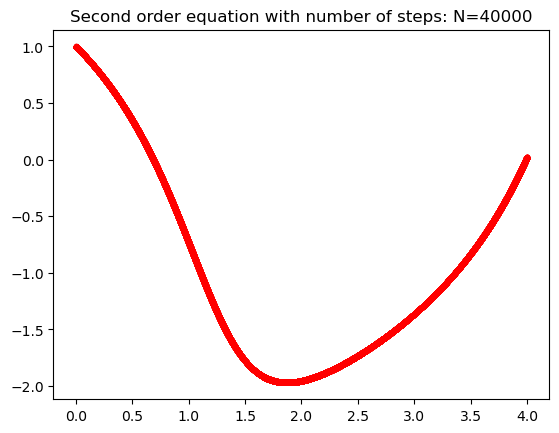

In [74]:
## visualize the numerical solutions: discrete data points
plt.plot(t, y, '.r-')
plt.title('Second order equation with number of steps: N=%i' %N)
plt.show()

In [75]:
## change N to 40, 400, and 4000. Run above cells, and plot the images for each. Observe 
## changes in the solution curves with varying N

Sometimes, it is easier to convert a higher order differential equation to a system of first order equations. The number of order is always equal to the number of 1st order equations. Let 
$$u(t)=y(t)$$ and $$v(t)=dy/dt,$$ 
then $u$ and $v$ satisfy the two *first order* differential equations:
$$du/dt = v$$ and 
$$dv/dt = (1-u^2)v-u.$$
We can write these two equations as a first order system: 
$\begin{pmatrix}du/dt\\ dv/dt\end{pmatrix} = \begin{pmatrix} 0 & 1\\ -1 & 1-u^2\end{pmatrix}\begin{pmatrix}u\\ v\end{pmatrix}$

with vector initial condition $\begin{pmatrix}u(0)\\ v(0)\end{pmatrix}=\begin{pmatrix}1\\ -1\end{pmatrix}$

In [76]:
# define zero vectors to store u and v. Let U = (u,v).T
U = np.zeros((2, np.size(t)))
U[:,0] = np.asarray([1,-1]).T
print(U.shape, U[:,0].shape)

(2, 40000) (2,)


In [77]:
## iterative step for computing the unknown value U as a vector 
for i in range(np.size(t)-1):
    tempMatrix = np.asarray([[0,1],[-1, 1 - U[0,i]**2]])
    U[:,i + 1] = tempMatrix.dot(U[:,i])*dt + U[:,i]
# the first component is what we want     

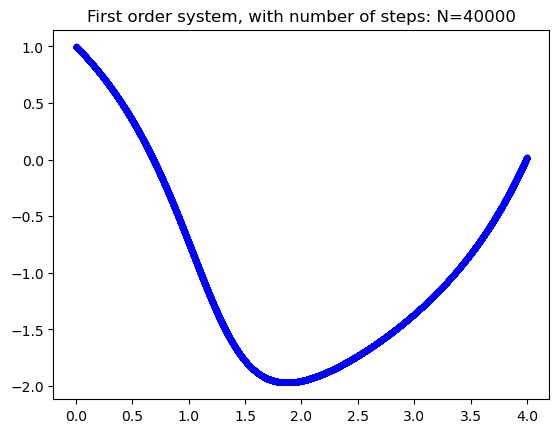

In [78]:
## visualize the numerical solutions: discrete data points, plot
## first component u for unknown function y(t)
plt.plot(t, U[0,:], '.b-')
plt.title('First order system, with number of steps: N=%i' %N)
plt.show()

In [79]:
# plt.plot(t, y, '.r', t, U[0,:], '.b', alpha = 0.2)
# plt.title('Comparison, with number of steps: N=%i' %N)
# plt.show()

Now run the following code for a *simpler problem*. Observe a comparison. IVP: 

$$y''+3y'+2y=0,\ y(0)=1,\ y'(0)=-1$$

In [80]:
## set up vectors and IC for linear y

## make a zero array to store computations

yl = np.zeros(np.size(t))

## initial condition y0 = 1 y'0 = -1

yl[0] = 1
yl[1] = -1*dt + yl[0]

## iterative step for computing the unknown value y
for i in range(1, np.size(t)-1):
    yl[i+1] = 2 * yl[i] - yl[i-1] - 3 * dt * (yl[i]-yl[i-1]) - 2 * dt ** 2 * yl[i]
    #1./(1/dt**2 + 3/dt)*(2/dt**2*yl[i] + 3/dt*yl[i] - 2*yl[i] - 1/dt**2*yl[i-1])

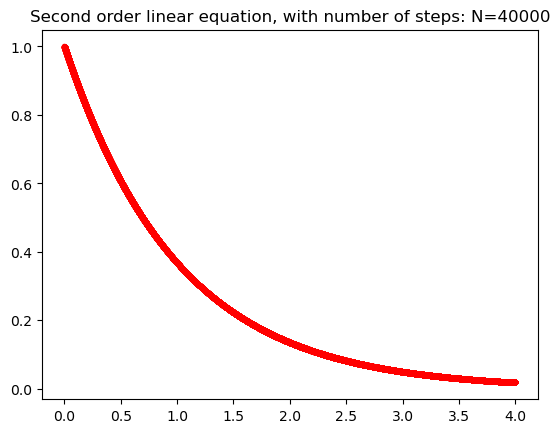

In [81]:
## visualize the numerical solutions: discrete data points, plot unknown function yl(t)
plt.plot(t, yl, '.r-')
plt.title('Second order linear equation, with number of steps: N=%i' %N)
plt.show()

Here we again formulate the second order problem into a system of two first order equations.

Let $$u(t)=y(t)$$ and $$v(t)=dy/dt,$$ 
then $u$ and $v$ satisfy the two *first order* differential equations:
$$du/dt = v$$ and 
$$dv/dt = -2u-3v.$$
We can write these two equations as a first order system: 
$\begin{pmatrix}du/dt\\ dv/dt\end{pmatrix} = \begin{pmatrix} 0 & 1\\ -2 & -3\end{pmatrix}\begin{pmatrix}u\\ v\end{pmatrix}$

with vector initial condition $\begin{pmatrix}u(0)\\ v(0)\end{pmatrix}=\begin{pmatrix}1\\ -1\end{pmatrix}$

In [82]:
# define zero vectors to store ul and vl. Let Ul = (ul,vl).T; initial condition as vector
Ul = np.zeros((2, np.size(t)))
Ul[:,0] = np.asarray([1,-1]).T

# define constant matrix
tempMatrixl = np.asarray([[0,1],[-2, -3]])

## iterative step for computing the unknown value U as a vector 
for i in range(np.size(t)-1):
    Ul[:,i + 1] = tempMatrixl.dot(Ul[:,i])*dt + Ul[:,i]
# the first component is what we want 

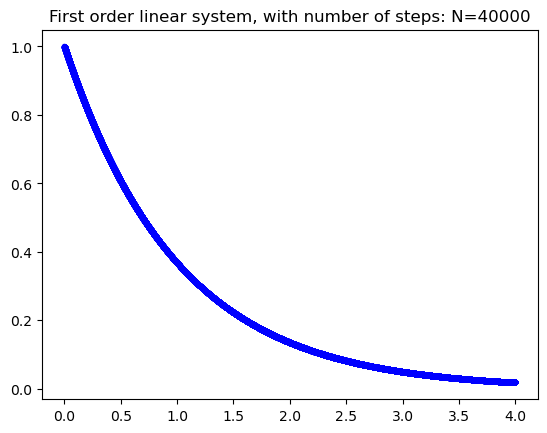

In [83]:
## visualize the numerical solutions: discrete data points, plot
## first component ul for unknown function yl(t)
plt.plot(t, Ul[0,:], '.b-')
plt.title('First order linear system, with number of steps: N=%i' %N)
plt.show()

In [84]:
# plt.plot(t, yl, '.r-', t, Ul[0,:], '.b-')
# plt.title('Comparison of constant linear equations, with number of steps: N=%i' %N)
# plt.show()

Computational methods are also very simple to implement when we have a nonhomogeneous problem. IVP: 

$$y''+3y'+2y=e^t + \sin(3t) - t,\ y(0)=1,\ y'(0)=-1$$

In [87]:
## set up vectors and IC for linear y

## make a zero array to store computations

Y = np.zeros(np.size(t))

## initial condition y0 = 1 y'0 = -1

Y[0] = 1
Y[1] = -1*dt + Y[0]

## iterative step for computing the unknown value y
for i in range(1, np.size(t)-1):
    Y[i+1] = 2 * Y[i] - Y[i-1] - 3 * dt * (Y[i]-Y[i-1]) - 2 * dt ** 2 * Y[i] 
    + np.exp(t[i]) + np.sin(t[i]) - t[i]

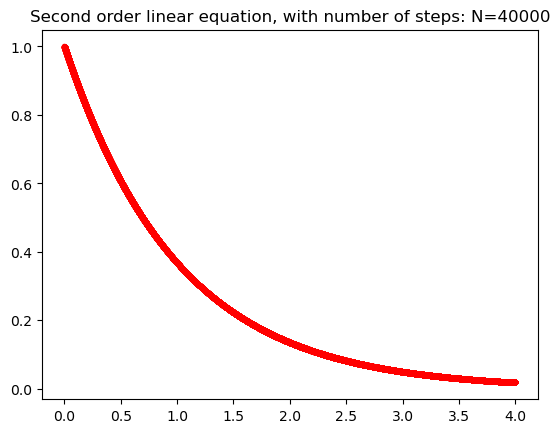

In [88]:
## visualize the numerical solutions: discrete data points, plot unknown function yl(t)
plt.plot(t, Y, '.r-')
plt.title('Second order linear equation, with number of steps: N=%i' %N)
plt.show()